# Car Price Prediction Project

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

# Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.4f}'.format

In [2]:
df = pd.read_csv('final_scout_not_dummy.csv')

In [3]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0000,Used,Diesel,7.0000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0000,2.0000,66.0000,1,Metallic,Cloth,Automatic,1422.0000,1220.0000,front,3.8000
1,Audi A1,Sedans,14500,Price negotiable,80000.0000,Used,Benzine,7.0000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0000,1.0000,141.0000,0,Metallic,Cloth,Automatic,1798.0000,1255.0000,front,5.6000
2,Audi A1,Sedans,14640,VAT deductible,83450.0000,Used,Diesel,7.0000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0000,1.0000,85.0000,0,Metallic,Cloth,Automatic,1598.0000,1135.0000,front,3.8000
3,Audi A1,Sedans,14500,VAT deductible,73000.0000,Used,Diesel,6.0000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0000,1.0000,66.0000,0,Metallic,Cloth,Automatic,1422.0000,1195.0000,front,3.8000
4,Audi A1,Sedans,16790,VAT deductible,16200.0000,Used,Diesel,7.0000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0000,1.0000,66.0000,1,Metallic,Cloth,Automatic,1422.0000,1135.0000,front,4.1000


In [4]:
df.vat.value_counts()

vat
VAT deductible      15044
Price negotiable      871
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [6]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,15915.0000,15915.0000,15915.0000,15915.0000,15915.0000,15915.0000,15915.0000,15915.0000,15915.0000,15915.0000
mean,18024.3806,32089.9957,5.9374,1.3897,1.0429,88.4993,0.2471,1428.6619,1337.7005,4.8321
std,7381.6793,36977.2150,0.7048,1.1213,0.3392,26.6743,0.4313,275.8043,199.6824,0.8675
min,4950.0000,0.0000,5.0000,0.0000,0.0000,40.0000,0.0000,890.0000,840.0000,3.0000
25%,12850.0000,1920.5000,5.0000,0.0000,1.0000,66.0000,0.0000,1229.0000,1165.0000,4.1000
50%,16900.0000,20413.0000,6.0000,1.0000,1.0000,85.0000,0.0000,1461.0000,1295.0000,4.8000
75%,21900.0000,46900.0000,6.0000,2.0000,1.0000,103.0000,0.0000,1598.0000,1472.0000,5.4000
max,74600.0000,317000.0000,8.0000,3.0000,4.0000,294.0000,1.0000,2967.0000,2471.0000,9.1000


In [7]:
df.duplicated().sum()

1673

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.make_model.value_counts()

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: count, dtype: int64

In [10]:
model_counts = df['make_model'].value_counts()
df = df[df['make_model'].isin(model_counts[model_counts >= 100].index)]

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14221 entries, 0 to 14220
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14221 non-null  object 
 1   body_type            14221 non-null  object 
 2   price                14221 non-null  int64  
 3   vat                  14221 non-null  object 
 4   km                   14221 non-null  float64
 5   Type                 14221 non-null  object 
 6   Fuel                 14221 non-null  object 
 7   Gears                14221 non-null  float64
 8   Comfort_Convenience  14221 non-null  object 
 9   Entertainment_Media  14221 non-null  object 
 10  Extras               14221 non-null  object 
 11  Safety_Security      14221 non-null  object 
 12  age                  14221 non-null  float64
 13  Previous_Owners      14221 non-null  float64
 14  hp_kW                14221 non-null  float64
 15  Inspection_new       14221 non-null 

## Feature Engineering

In [13]:
df_object = df.select_dtypes(include='O')
df_object

,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14216,Renault Espace,Van,VAT deductible,Pre-registered,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Central door lock,...",Metallic,Part/Full Leather,Automatic,front
14217,Renault Espace,Van,VAT deductible,New,Diesel,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",Metallic,Part/Full Leather,Automatic,front
14218,Renault Espace,Van,VAT deductible,Demonstration,Benzine,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter,Sport suspens...","ABS,Adaptive Cruise Control,Blind spot monitor...",Metallic,Part/Full Leather,Automatic,front
14219,Renault Espace,Van,VAT deductible,Used,Benzine,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",Metallic,Cloth,Automatic,front


In [14]:
#Cehck the cardinality of object columns
for i in df_object.columns:
    print(f'{i:<30}:',df[i].nunique())

make_model                    : 7
body_type                     : 8
vat                           : 2
Type                          : 5
Fuel                          : 4
Comfort_Convenience           : 6195
Entertainment_Media           : 346
Extras                        : 659
Safety_Security               : 4441
Paint_Type                    : 3
Upholstery_type               : 2
Gearing_Type                  : 3
Drive_chain                   : 3


### Converting the Extras feature from object to numeric

In [15]:
df.Extras.sample(3)

6047     Roof rack,Voice Control
10073               Alloy wheels
8543                Alloy wheels
Name: Extras, dtype: object

In [16]:
#Check the number of extras for each observation
df.Extras.apply(lambda x: len(x.split(',')))

0        3
1        4
2        2
3        3
4        4
        ..
14216    3
14217    2
14218    5
14219    3
14220    1
Name: Extras, Length: 14221, dtype: int64

In [17]:
df['Extras'] = df.Extras.apply(lambda x: len(x.split(',')))

### Confort_Convinience

In [18]:
df.Comfort_Convenience.sample(5)

2000     Air conditioning,Armrest,Automatic climate con...
14203    Air conditioning,Automatic climate control,Cru...
7322     Air conditioning,Armrest,Automatic climate con...
6616     Air conditioning,Cruise control,Electrical sid...
3220     Air conditioning,Cruise control,Electrical sid...
Name: Comfort_Convenience, dtype: object

In [19]:
premium = ["Electrical side mirrors", "Parking assist", "Air conditioning", "Hill Holder", "Power windows"]
premium_plus = ["Multi-function", "Navigation ", "Keyless central door lock", "Heads-up", "Massage seats", "heating", "Automatic climate control", "Heated"]

comfort_package = df['Comfort_Convenience'].apply(lambda sentence: "Premium Plus" if all(word in sentence for word in premium_plus) else ("Premium" if all(word in sentence for word in premium) else "Standard"))
comfort_package.value_counts()

Comfort_Convenience
Standard        9648
Premium         4510
Premium Plus      63
Name: count, dtype: int64

In [20]:
premium = ["Electrical side mirrors", "Parking assist", "Air conditioning", "Hill Holder", "Power windows"]
premium_plus = ["Multi-function", "Navigation ", "Keyless central door lock", "Heads-up", "Massage seats", "heating", "Automatic climate control", "Heated"]

df['Comfort_Convenience'] = df['Comfort_Convenience'].apply(lambda sentence: "Premium Plus" if all(word in sentence for word in premium_plus) else ("Premium" if all(word in sentence for word in premium) else "Standard"))
df.head(3)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0000,Used,Diesel,7.0000,Premium,"Bluetooth,Hands-free equipment,On-board comput...",3,"ABS,Central door lock,Daytime running lights,D...",3.0000,2.0000,66.0000,1,Metallic,Cloth,Automatic,1422.0000,1220.0000,front,3.8000
1,Audi A1,Sedans,14500,Price negotiable,80000.0000,Used,Benzine,7.0000,Standard,"Bluetooth,Hands-free equipment,On-board comput...",4,"ABS,Central door lock,Central door lock with r...",2.0000,1.0000,141.0000,0,Metallic,Cloth,Automatic,1798.0000,1255.0000,front,5.6000
2,Audi A1,Sedans,14640,VAT deductible,83450.0000,Used,Diesel,7.0000,Premium,"MP3,On-board computer",2,"ABS,Central door lock,Daytime running lights,D...",3.0000,1.0000,85.0000,0,Metallic,Cloth,Automatic,1598.0000,1135.0000,front,3.8000


In [21]:
df.Comfort_Convenience.value_counts(dropna=False)

Comfort_Convenience
Standard        9648
Premium         4510
Premium Plus      63
Name: count, dtype: int64

### Entertainment_Media

In [22]:
df.Entertainment_Media.sample(3)

10830               Hands-free equipment,On-board computer
1666     Bluetooth,CD player,Hands-free equipment,MP3,O...
2900                                     On-board computer
Name: Entertainment_Media, dtype: object

In [23]:
media_plus = ["Digital", "Television"]

# media_plus = ["Digital radio", "Hands-free", "Television"]

entertainment_media_package = df['Entertainment_Media'].apply(lambda sentence: "Plus" if any(word in sentence for word in media_plus) else "Standard")
entertainment_media_package.value_counts()

Entertainment_Media
Standard    12137
Plus         2084
Name: count, dtype: int64

In [24]:
media_plus = ["Digital radio", "Hands-free", "Television"]

entertainment_media_package = df['Entertainment_Media'].apply(lambda sentence: "Plus" if any(word in sentence for word in media_plus) else "Standard")
entertainment_media_package.value_counts()

Entertainment_Media
Plus        9769
Standard    4452
Name: count, dtype: int64

In [25]:
media_plus = ["Digital", "Television"]

df['Entertainment_Media'] = df['Entertainment_Media'].apply(lambda sentence: "Plus" if any(word in sentence for word in media_plus) else "Standard")
df.head(2)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0000,Used,Diesel,7.0000,Premium,Standard,3,"ABS,Central door lock,Daytime running lights,D...",3.0000,2.0000,66.0000,1,Metallic,Cloth,Automatic,1422.0000,1220.0000,front,3.8000
1,Audi A1,Sedans,14500,Price negotiable,80000.0000,Used,Benzine,7.0000,Standard,Standard,4,"ABS,Central door lock,Central door lock with r...",2.0000,1.0000,141.0000,0,Metallic,Cloth,Automatic,1798.0000,1255.0000,front,5.6000


In [26]:
df['Entertainment_Media'].value_counts(dropna=False)

Entertainment_Media
Standard    12137
Plus         2084
Name: count, dtype: int64

### Safety_Security

In [27]:
df.Safety_Security.sample(3)

13432    ABS,Central door lock with remote control,Driv...
11317    ABS,Adaptive headlights,Central door lock,Dayt...
13258    ABS,Central door lock,Daytime running lights,P...
Name: Safety_Security, dtype: object

In [28]:
premium = ["Tire pressure", "Traction control", "Daytime running lights", "LED Headlight", "Tire pressure"]
premium_plus = ["Emergency brake assistant", "Electronic stability control"]

safety_security_package = df['Safety_Security'].apply(lambda sentence: "Safety Premium Package" if any(word in sentence for word in premium) else ("Safety Premium Plus Package" if any(word in sentence for word in premium_plus) else "Safety Standard Package"))
safety_security_package.value_counts()

Safety_Security
Safety Premium Package         13089
Safety Premium Plus Package      727
Safety Standard Package          405
Name: count, dtype: int64

In [29]:
premium = ["Tire pressure", "Traction control", "Daytime running lights", "LED Headlight", "Tire pressure"]
premium_plus = ["Emergency brake assistant", "Electronic stability control"]

df['Safety_Security'] = df['Safety_Security'].apply(lambda sentence: "Safety Premium Package" if any(word in sentence for word in premium) else ("Safety Premium Plus Package" if any(word in sentence for word in premium_plus) else "Safety Standard Package"))
df.head(3)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0000,Used,Diesel,7.0000,Premium,Standard,3,Safety Premium Package,3.0000,2.0000,66.0000,1,Metallic,Cloth,Automatic,1422.0000,1220.0000,front,3.8000
1,Audi A1,Sedans,14500,Price negotiable,80000.0000,Used,Benzine,7.0000,Standard,Standard,4,Safety Premium Package,2.0000,1.0000,141.0000,0,Metallic,Cloth,Automatic,1798.0000,1255.0000,front,5.6000
2,Audi A1,Sedans,14640,VAT deductible,83450.0000,Used,Diesel,7.0000,Premium,Standard,2,Safety Premium Package,3.0000,1.0000,85.0000,0,Metallic,Cloth,Automatic,1598.0000,1135.0000,front,3.8000


In [30]:
for i in df_object.columns:
    print(f'{i:<30}:',df[i].nunique())

make_model                    : 7
body_type                     : 8
vat                           : 2
Type                          : 5
Fuel                          : 4
Comfort_Convenience           : 3
Entertainment_Media           : 2
Extras                        : 10
Safety_Security               : 3
Paint_Type                    : 3
Upholstery_type               : 2
Gearing_Type                  : 3
Drive_chain                   : 3


### Numeric Features

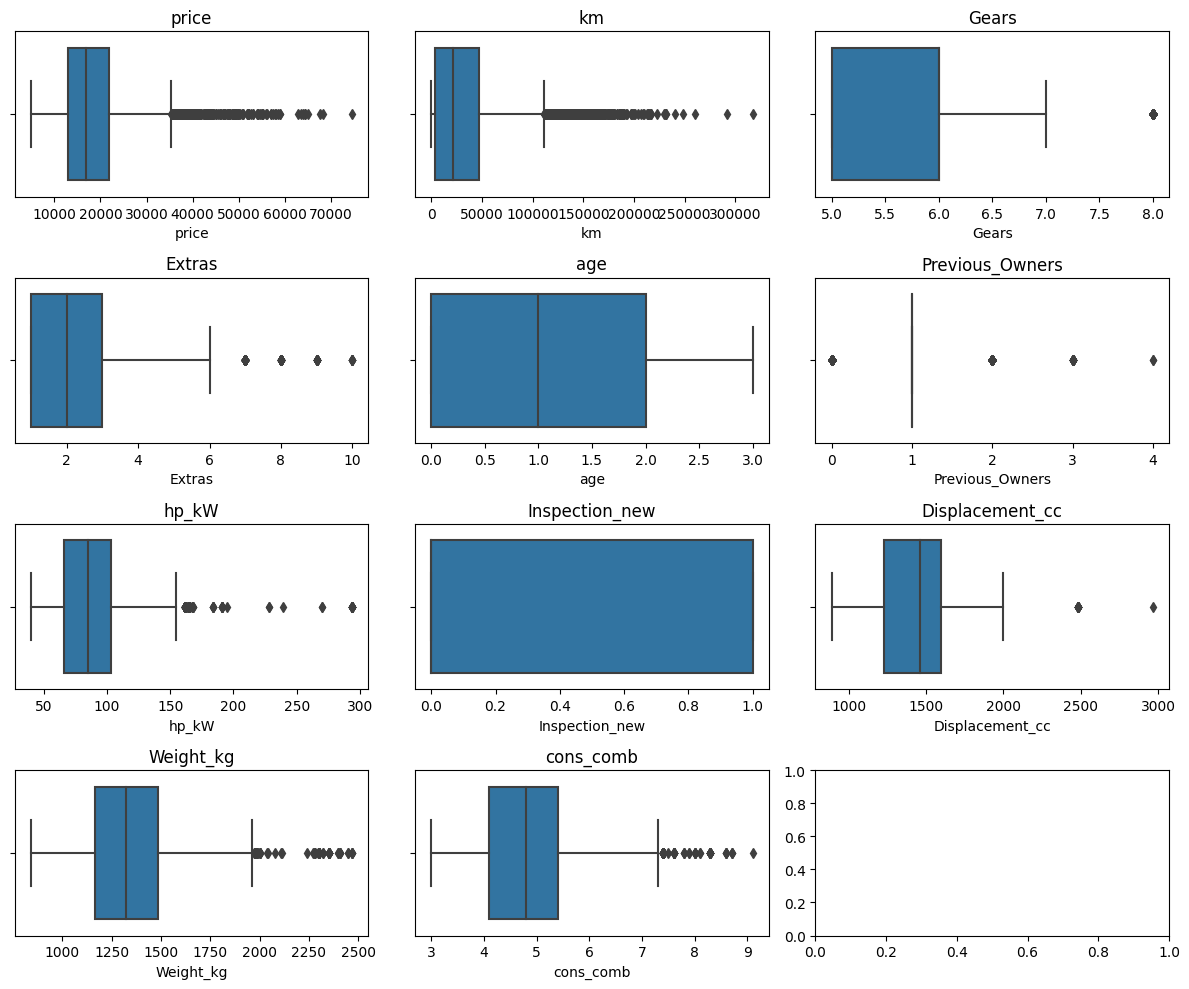

In [31]:
fig, axes = plt.subplots(4, 3, figsize=(12, 10))

axes = axes.flatten()

# Iterate through each column and plot a histogram in the corresponding subplot
for i, column in enumerate(df.select_dtypes('number').columns):
    ax = axes[i]
    sns.boxplot(data=df, x=column,  ax=ax) 
    ax.set_title(column)
    
plt.tight_layout()

## multicollinearity control

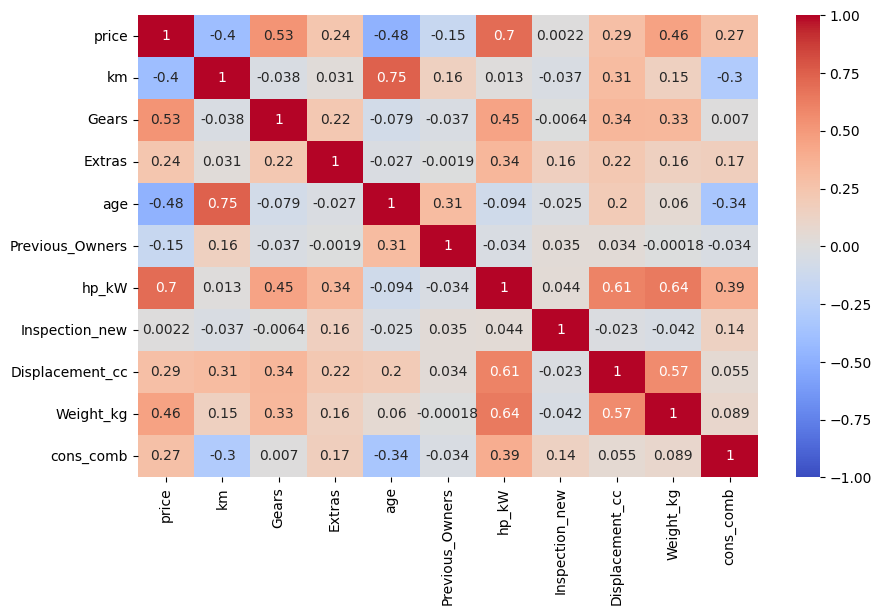

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True,cmap='coolwarm');

In [33]:
#Check abs(corr)>=0.9
df.corr(numeric_only=True)[(abs(df.corr(numeric_only=True))>= 0.9) & (abs(df.corr(numeric_only=True)) < 1)] .any().any()

False

### VIF (Variance Inflation Factor) Score for Multicolliniearity

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataframe):
    vif_data = dataframe.copy()
    vif_data = vif_data.select_dtypes(include=['number'])  # Only numeric columns
    
    # Create a DataFrame to store the VIF values
    vif_df = pd.DataFrame()
    vif_df["Feature"] = vif_data.columns
    vif_df["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    
    return vif_df

In [35]:
vif_result = calculate_vif(df.drop(columns='price'))
vif_result

,Feature,VIF
0,km,4.4519
1,Gears,56.5749
2,Extras,3.8548
3,age,6.8164
4,Previous_Owners,11.7025
5,hp_kW,26.9987
6,Inspection_new,1.4116
7,Displacement_cc,53.8528
8,Weight_kg,72.2767
9,cons_comb,30.2024


## Outliers in Price Column

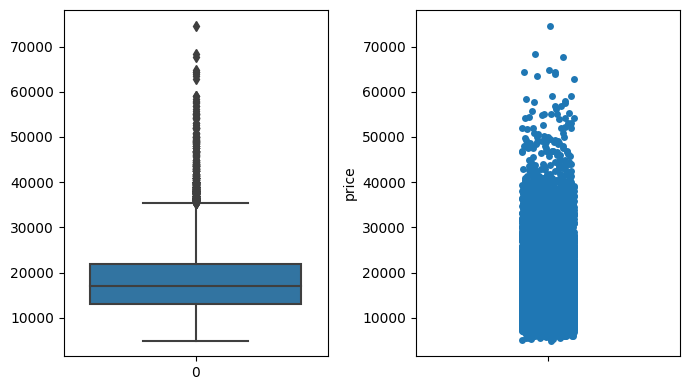

In [36]:
#price
plt.subplot(121)
sns.boxplot(df.price)

plt.subplot(122)
sns.stripplot(df.price)
plt.tight_layout();

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

### Train | Test Split

In [37]:
X = df.drop(columns='price')
y = df.price

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### OneHotEncoder & OrdinalEncoder

In [39]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [40]:
df.select_dtypes('O').columns

Index(['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Comfort_Convenience',
       'Entertainment_Media', 'Safety_Security', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')

In [41]:
df.select_dtypes('O').head(1)

,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,Premium,Standard,Safety Premium Package,Metallic,Cloth,Automatic,front


In [42]:
cat_onehot = ['make_model', 'body_type', 'vat', 'Fuel', 'Paint_Type',
              'Upholstery_type', 'Gearing_Type', 'Drive_chain']
cat_ordinal = ['Type', 'Comfort_Convenience', 'Entertainment_Media','Safety_Security']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered", "New"]
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [43]:
df.Type.value_counts().index

Index(['Used', 'New', 'Pre-registered', 'Employee's car', 'Demonstration'], dtype='object', name='Type')

In [44]:
enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc_ordinal = OrdinalEncoder(categories= [cat_for_type,
                                          cat_for_comfort,
                                          cat_for_ent,
                                          cat_for_safety])

column_trans = make_column_transformer((enc_onehot, cat_onehot),
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough', 
                                        verbose_feature_names_out=False).set_output(transform="pandas") # MinMaxScaler()

In [45]:
column_trans.fit_transform(X_train)

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,Type,Comfort_Convenience,Entertainment_Media,Safety_Security,km,Gears,Extras,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
14210,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,2.0000,1.0000,1.0000,1.0000,500.0000,6.0000,2,0.0000,1.0000,165.0000,0,1798.0000,1760.0000,6.8000
10027,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,68116.0000,6.0000,3,3.0000,1.0000,100.0000,1,1598.0000,1487.0000,3.9000
318,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,56967.0000,7.0000,2,3.0000,2.0000,70.0000,1,999.0000,1180.0000,4.4000
4098,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,21000.0000,6.0000,4,1.0000,1.0000,85.0000,0,1598.0000,1335.0000,4.0000
3344,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,26613.0000,7.0000,3,2.0000,1.0000,110.0000,0,1395.0000,1300.0000,4.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,53735.0000,6.0000,2,3.0000,1.0000,110.0000,0,1399.0000,1308.0000,5.4000
13418,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1935.0000,6.0000,1,1.0000,1.0000,118.0000,0,1598.0000,1734.0000,4.6000
5390,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,38397.0000,5.0000,1,3.0000,1.0000,77.0000,0,998.0000,1216.0000,4.2000
860,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,37064.0000,5.0000,4,2.0000,1.0000,60.0000,1,999.0000,1135.0000,4.2000


In [46]:
column_trans.fit_transform(X_train)

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,Type,Comfort_Convenience,Entertainment_Media,Safety_Security,km,Gears,Extras,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
14210,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,2.0000,1.0000,1.0000,1.0000,500.0000,6.0000,2,0.0000,1.0000,165.0000,0,1798.0000,1760.0000,6.8000
10027,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,68116.0000,6.0000,3,3.0000,1.0000,100.0000,1,1598.0000,1487.0000,3.9000
318,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,56967.0000,7.0000,2,3.0000,2.0000,70.0000,1,999.0000,1180.0000,4.4000
4098,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,21000.0000,6.0000,4,1.0000,1.0000,85.0000,0,1598.0000,1335.0000,4.0000
3344,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,26613.0000,7.0000,3,2.0000,1.0000,110.0000,0,1395.0000,1300.0000,4.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,53735.0000,6.0000,2,3.0000,1.0000,110.0000,0,1399.0000,1308.0000,5.4000
13418,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1935.0000,6.0000,1,1.0000,1.0000,118.0000,0,1598.0000,1734.0000,4.6000
5390,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,38397.0000,5.0000,1,3.0000,1.0000,77.0000,0,998.0000,1216.0000,4.2000
860,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,37064.0000,5.0000,4,2.0000,1.0000,60.0000,1,999.0000,1135.0000,4.2000


## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics


### Pipeline
- Read the documentation and apply pipeline on the rest of the notebook
- link : https://scikit-learn.org/stable/modules/compose.html

What happens can be described as follows:
The data are split into TRAINING data and TEST data according to ratio of train_test_split

***fit process:***

Step 1: the onehotencoder is fitted on the categoric features in cat_onehot list for TRAINING data

Step 2: the onehotencoder transforms the categoric features in cat_onehot list for TRAINING data

step 3: the ordinalencoder is fitted on the categoric features in cat_ordinal list for TRAINING data

Step 4: the ordinalencoder transforms the categoric features in cat_ordinal list for TRAINING data

step 5: the numeric features of TRAINING data are left as they are

Step 6: the minmaxscaler is fitted on all features of transformed TRAINING data

Step 7: the minmaxscaler transforms all features of transformed TRAINING data

Step 8: the models are fitted/trained using the scaled and transformed TRAINING data

***predict process:***

Step 1: the onehotencoder transforms the categoric features in cat_onehot list of TEST data according to TRAINING data

Step 2: the ordinalencoder transforms the categoric features in cat_ordinal list of TEST data according to TRAINING data

step 3: the numeric features of TRAINING data are left as they are

Step 4: the minmaxscaler transforms all features of TEST data according to TRAINING data

Step 5: the trained models predict using the scaled and transformed TEST data

pipe_model.fit(X_train, y_train) --> columns_trans.fit_transform(X_train) --> scaler.fit_transform(X_train_trans)--> Lasso.fit(X_train_trans_and_scaled, y_train)

pipe_model.predict(X_test)       --> columns_trans.transform(X_test)      -->   scaler.transform(X_test_trans) -->Lasso.predict(X_test_trans_and_scaled)


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : mean_squared_error(y_train, y_train_pred, squared=False),
    "mape" :mean_absolute_percentage_error(y_train, y_train_pred)},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : mean_squared_error(y_test, y_pred, squared=False),
    "mape" :mean_absolute_percentage_error(y_test, y_pred)}}

    return pd.DataFrame(scores)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("liner_model", LinearRegression())]

lm = Pipeline(steps=operations)
lm.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered',
                                                                              'New'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Type',
                                                   'Comfort_Convenience',
                                                   'Entertainment_Media',
                                                   'Safety_Security'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('liner_model', LinearRegression())])

In [49]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.8622,0.8634
mae,1906.4537,1853.3518
mse,7605161.5915,7469661.3504
rmse,2757.7457,2733.0681
mape,0.1152,0.1108


### Cross Validate

In [50]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("liner_model", LinearRegression())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [51]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.0639,0.0194,0.8599,0.8624,-1941.8102,-1908.0372,-7967276.1547,-7569495.0124,-2822.6364,-2751.2715,-0.1175,-0.1156
2,0.0735,0.0190,0.8533,0.8630,-1966.0356,-1901.2565,-8143549.2512,-7557305.1932,-2853.6905,-2749.0553,-0.1243,-0.1144
3,0.0791,0.0202,0.8843,0.8597,-1828.5967,-1917.9502,-6387175.1186,-7743554.7884,-2527.2861,-2782.7243,-0.1108,-0.1159
4,0.0727,0.0170,0.8662,0.8618,-1849.6687,-1921.8154,-6463622.6617,-7735330.0004,-2542.3656,-2781.2461,-0.1173,-0.1159
5,0.0692,0.0161,0.8546,0.8628,-1924.8954,-1908.9592,-7652965.2012,-7609317.8638,-2766.3993,-2758.4992,-0.1188,-0.1154
6,0.0621,0.0155,0.8605,0.8622,-1896.4895,-1909.6808,-7193439.6863,-7661285.5861,-2682.0589,-2767.9027,-0.1104,-0.1157
7,0.0591,0.0145,0.8494,0.8636,-1977.3813,-1894.0919,-9159557.0517,-7443634.2367,-3026.4760,-2728.3024,-0.1153,-0.1148
8,0.0516,0.0155,0.8685,0.8615,-1872.2269,-1909.0248,-7438548.8250,-7625378.6466,-2727.3703,-2761.4088,-0.1131,-0.1153
9,0.0609,0.0162,0.8426,0.8642,-2034.2427,-1893.4100,-8959199.4072,-7467969.1176,-2993.1922,-2732.7585,-0.1203,-0.1148
10,0.0558,0.0135,-9265472424576050790400.0000,0.8618,-37263584504376.2188,-1905.6573,-526269822660576439469657292800.0000,-7603710.4593,-725444568978620.5000,-2757.4826,-2272446698.6439,-0.1152


In [52]:
scores.iloc[:,2:].mean()

test_r2                                            -926547242457605079040.0000
train_r2                                                                0.8623
test_neg_mean_absolute_error                               -3726358452166.7563
train_neg_mean_absolute_error                                       -1906.9883
test_neg_mean_squared_error                -52626982266057643946965729280.0000
train_neg_mean_squared_error                                     -7601698.0905
test_neg_root_mean_squared_error                          -72544456900356.2031
train_neg_root_mean_squared_error                                   -2757.0652
test_neg_mean_absolute_percentage_error                        -227244669.9692
train_neg_mean_absolute_percentage_error                               -0.1153
dtype: float64

In [53]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.8622,0.8634
mae,1906.4537,1853.3518
mse,7605161.5915,7469661.3504
rmse,2757.7457,2733.0681
mape,0.1152,0.1108


In [54]:
y_pred = lm.predict(X_test)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lm_mape= mean_absolute_percentage_error(y_test, y_pred)

## Ridge

In [55]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered',
                                                                              'New'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Type',
                                                   'Comfort_Convenience',
                                                   'Entertainment_Media',
                                                   'Safety_Security'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [56]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.8622,0.8638
mae,1905.7551,1850.0015
mse,7607792.2267,7447492.3015
rmse,2758.2227,2729.0094
mape,0.1151,0.1108


### Cross Validate

In [57]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [58]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.0446,0.0135,0.8601,0.8623,-1942.1821,-1907.5385,-7953456.6364,-7574771.2734,-2820.1873,-2752.2302,-0.1176,-0.1154
2,0.0622,0.0105,0.8533,0.8629,-1968.5545,-1898.7534,-8142185.3197,-7559719.2820,-2853.4515,-2749.4944,-0.1244,-0.1141
3,0.0551,0.0105,0.8844,0.8597,-1827.3377,-1918.4639,-6381651.8012,-7746557.4815,-2526.1931,-2783.2638,-0.1107,-0.1159
4,0.0419,0.0105,0.8664,0.8617,-1846.0485,-1918.3611,-6450676.9562,-7738946.3151,-2539.8183,-2781.8962,-0.1169,-0.1155
5,0.0419,0.0115,0.8555,0.8628,-1922.4787,-1908.6220,-7605493.7395,-7611390.4561,-2757.8060,-2758.8749,-0.1183,-0.1153
6,0.0501,0.0125,0.8603,0.8622,-1891.4496,-1908.1447,-7202350.9751,-7661502.2582,-2683.7196,-2767.9419,-0.1100,-0.1156
7,0.0573,0.0145,0.8484,0.8636,-1974.9970,-1893.1251,-9220448.4235,-7445673.8856,-3036.5191,-2728.6762,-0.1149,-0.1146
8,0.0505,0.0161,0.8686,0.8614,-1870.7925,-1905.7968,-7433740.2956,-7630682.3907,-2726.4886,-2762.3690,-0.1129,-0.1150
9,0.0493,0.0126,0.8432,0.8643,-2026.2523,-1890.0606,-8925656.8697,-7463517.7048,-2987.5838,-2731.9439,-0.1196,-0.1144
10,0.0511,0.0151,0.8642,0.8618,-1882.3124,-1904.7740,-7714180.6165,-7606454.7034,-2777.4414,-2757.9802,-0.1120,-0.1151


In [59]:
scores.iloc[:,2:].mean()

test_r2                                           0.8604
train_r2                                          0.8623
test_neg_mean_absolute_error                  -1915.2405
train_neg_mean_absolute_error                 -1905.3640
test_neg_mean_squared_error                -7702984.1633
train_neg_mean_squared_error               -7603921.5751
test_neg_root_mean_squared_error              -2770.9209
train_neg_root_mean_squared_error             -2757.4671
test_neg_mean_absolute_percentage_error          -0.1157
train_neg_mean_absolute_percentage_error         -0.1151
dtype: float64

### Prediction Error

In [60]:
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

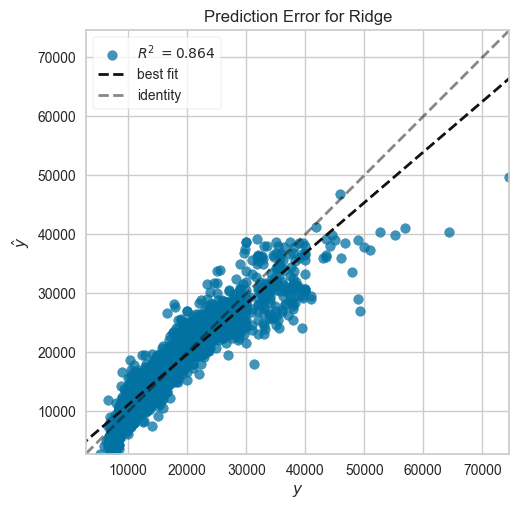

In [61]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)

# Fit the pipeline on the training data
ridge_model.fit(X_train, y_train)

# Visualize Prediction Error
visualizer_pred_error = PredictionError(ridge_model)
visualizer_pred_error.fit(X_train, y_train)
visualizer_pred_error.score(X_test, y_test)
visualizer_pred_error.show();

### Residual Plot

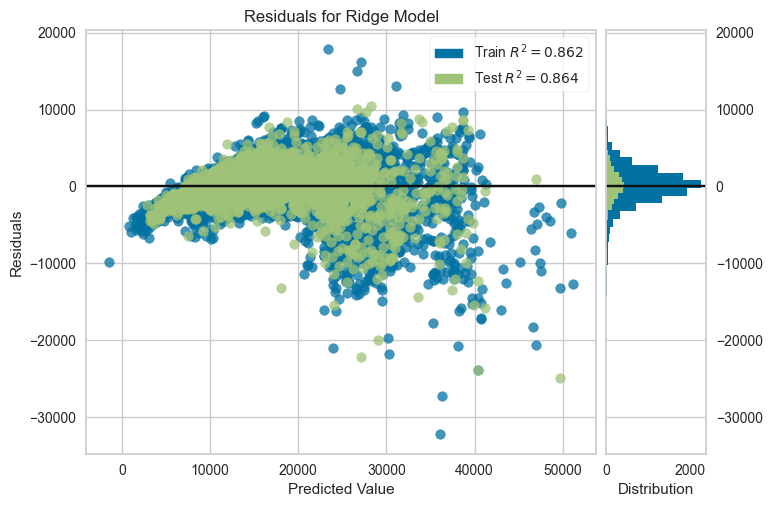

In [62]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)

# Fit the pipeline on the training data
ridge_model.fit(X_train, y_train)

# Visualize Residuals
visualizer_residuals = ResidualsPlot(ridge_model)
visualizer_residuals.fit(X_train, y_train)
visualizer_residuals.score(X_test, y_test)
visualizer_residuals.show();

### Dropping outliers from the dataset

In [63]:
df = df[(df.price > 7500)&(df.price <70000)]

In [64]:
X = df.drop(columns = "price")
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered',
                                                                              'New'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Type',
                                                   'Comfort_Convenience',
                                                   'Entertainment_Media',
                                                   'Safety_Security'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [66]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.8590,0.8614
mae,1903.8848,1859.6110
mse,7582718.8769,7160689.2454
rmse,2753.6737,2675.9464
mape,0.1109,0.1103


### Finding best alpha for Ridge

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
alpha_space = np.linspace(0.001, 100, 100)

In [69]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha': alpha_space} # Parameter names should be used together with the model name defined
                                           # in the pipeline.

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                                param_grid=param_grid,
                                scoring='neg_root_mean_squared_error',
                                cv=10,
                                n_jobs=-1,
                                return_train_score=True)

In [70]:
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'vat',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [71]:
ridge_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered',
                                                                              'New'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Type',
                                                   'Comfort_Convenience',
                                                   'Entertainment_Media',
                                                   'Safety_Security'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge(alpha=0.001))])

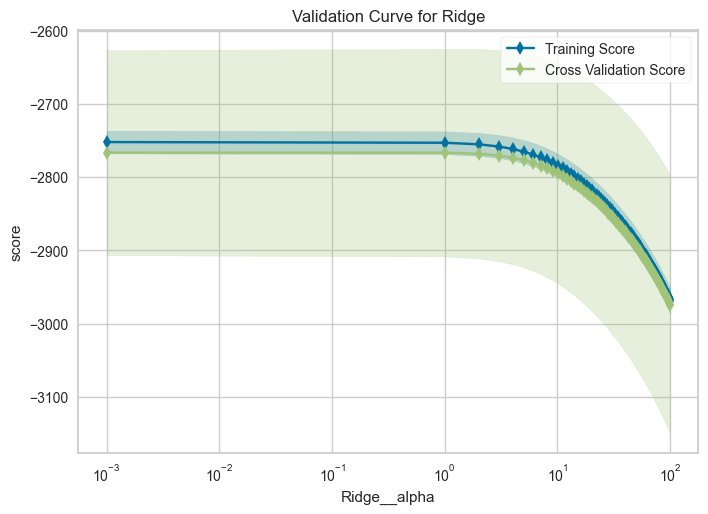

<Axes: title={'center': 'Validation Curve for Ridge'}, xlabel='Ridge__alpha', ylabel='score'>

In [72]:
from yellowbrick.model_selection import ValidationCurve
viz = ValidationCurve(
                        pipe_model, 
                        param_name="Ridge__alpha", 
                        param_range=np.linspace(0.001, 100, 100),
                        logx=True, 
                        cv=10, 
                        scoring="neg_root_mean_squared_error", 
                        n_jobs=-1,
)

viz.fit(X_train, y_train)
viz.show()

In [73]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[ridge_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -2766.4543
mean_train_score   -2751.9945
Name: 0, dtype: object

In [74]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.8590,0.8612
mae,1904.5361,1861.1145
mse,7578581.8418,7168615.5537
rmse,2752.9224,2677.4270
mape,0.1110,0.1104


In [75]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = mean_squared_error(y_test, y_pred, squared=False)
rm_mape= mean_absolute_percentage_error(y_test, y_pred)

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [76]:
from sklearn.linear_model import Lasso

In [77]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered',
                                                                              'New'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Type',
                                                   'Comfort_Convenience',
                                                   'Entertainment_Media',
                                                   'Safety_Security'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso())])

In [78]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.8589,0.8618
mae,1904.0194,1858.4994
mse,7588621.0804,7138730.2934
rmse,2754.7452,2671.8402
mape,0.1109,0.1102


### Cross Validation

In [79]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)
scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [80]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                           0.8573
train_r2                                          0.8589
test_neg_mean_absolute_error                  -1911.6117
train_neg_mean_absolute_error                 -1903.6551
test_neg_mean_squared_error                -7668416.1034
train_neg_mean_squared_error               -7584314.5510
test_neg_root_mean_squared_error              -2765.5623
train_neg_root_mean_squared_error             -2753.9203
test_neg_mean_absolute_percentage_error          -0.1113
train_neg_mean_absolute_percentage_error         -0.1108
dtype: float64

### Finding best alpha for Lasso

In [81]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space} # Parameter names should be used together with the model name defined in the pipeline.

lasso_grid_model = GridSearchCV(estimator=model,
                                param_grid=param_grid,
                                scoring='neg_root_mean_squared_error',
                                cv=10,
                                n_jobs=-1,
                                return_train_score=True)

In [82]:
lasso_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'vat',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [83]:
lasso_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstrat...
                                                                              'Pre-registered',
                                                                              'New'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Type',
                                                   'Comfort_Convenience',
                                                   'Entertainment_Media',
                                                   'Safety_Security'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Lasso', Lasso(alpha=1.011090909090909))])

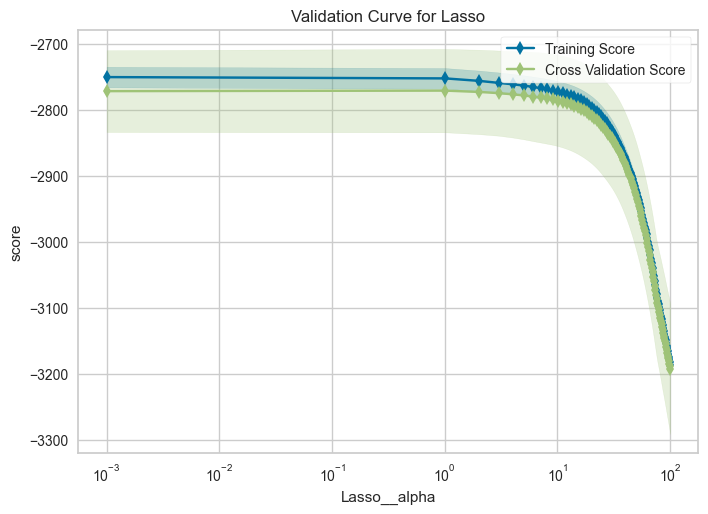

<Axes: title={'center': 'Validation Curve for Lasso'}, xlabel='Lasso__alpha', ylabel='score'>

In [84]:
viz = ValidationCurve(
                        model, 
                        param_name="Lasso__alpha", 
                        param_range=np.linspace(0.001, 100, 100),
                        logx=True, 
                        cv=5, 
                        scoring="neg_root_mean_squared_error", 
                        n_jobs=-1,
)

viz.fit(X_train, y_train)
viz.show()

In [85]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[lasso_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -2765.5715
mean_train_score   -2753.9539
Name: 1, dtype: object

In [86]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.8589,0.8618
mae,1904.0189,1858.4786
mse,7588803.2988,7138500.9345
rmse,2754.7783,2671.7973
mape,0.1109,0.1102


In [87]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lasm_mape= mean_absolute_percentage_error(y_test, y_pred)

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [88]:
from sklearn.linear_model import ElasticNet

In [89]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet())]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered',
                                                                              'New'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Type',
                                                   'Comfort_Convenience',
                                                   'Entertainment_Media',
                                                   'Safety_Security'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('ElasticNet', ElasticNet())])

In [90]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.4596,0.4660
mae,3932.5194,3907.2614
mse,29056175.4436,27578249.0764
rmse,5390.3780,5251.4997
mape,0.2408,0.2465


### Cross Validation

In [91]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [92]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.4590
train_r2                                           0.4598
test_neg_mean_absolute_error                   -3934.4525
train_neg_mean_absolute_error                  -3931.6357
test_neg_mean_squared_error                -29086054.2338
train_neg_mean_squared_error               -29044043.6788
test_neg_root_mean_squared_error               -5388.9013
train_neg_root_mean_squared_error              -5389.2180
test_neg_mean_absolute_percentage_error           -0.2409
train_neg_mean_absolute_percentage_error          -0.2407
dtype: float64

### Finding best alpha and l1_ratio for ElasticNet

In [93]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

param_grid = {'ElasticNet__alpha':[0.001,0.01, 0.5, 1, 2,  3, 4],
              'ElasticNet__l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=model,
                                  param_grid=param_grid,
                                  scoring='neg_root_mean_squared_error',
                                  cv=10,
                                  n_jobs = -1,
                                  return_train_score=True)

In [94]:
elastic_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'vat',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',...
                                                                                                     'Package']]),
                                                                         ['Type',
                                                                          'Comfort_Convenience',
                                                                          'Entertainment_Media',
                                                                          'Safety_Security'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('ElasticNet', ElasticNet())]),
             n_jobs=-1,
             param_grid={'ElasticNet__alpha': [0.001, 0.01, 0.5, 1, 2, 3, 4],
                         'ElasticNet__l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99,
                                                  1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [95]:
elastic_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstrat...
                                                                              'Pre-registered',
                                                                              'New'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Type',
                                                   'Comfort_Convenience',
                                                   'Entertainment_Media',
                                                   'Safety_Security'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('ElasticNet', ElasticNet(alpha=0.5, l1_ratio=1))])

In [96]:
pd.DataFrame(elastic_grid_model.cv_results_).loc[elastic_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -2765.5167
mean_train_score   -2752.5442
Name: 17, dtype: object

In [97]:
train_val(elastic_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.8590,0.8615
mae,1904.1195,1859.6439
mse,7581413.1587,7151458.5520
rmse,2753.4366,2674.2211
mape,0.1109,0.1103


In [98]:
y_pred = elastic_grid_model.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = mean_squared_error(y_test, y_pred, squared=False)
em_mape= mean_absolute_percentage_error(y_test, y_pred)

## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model 

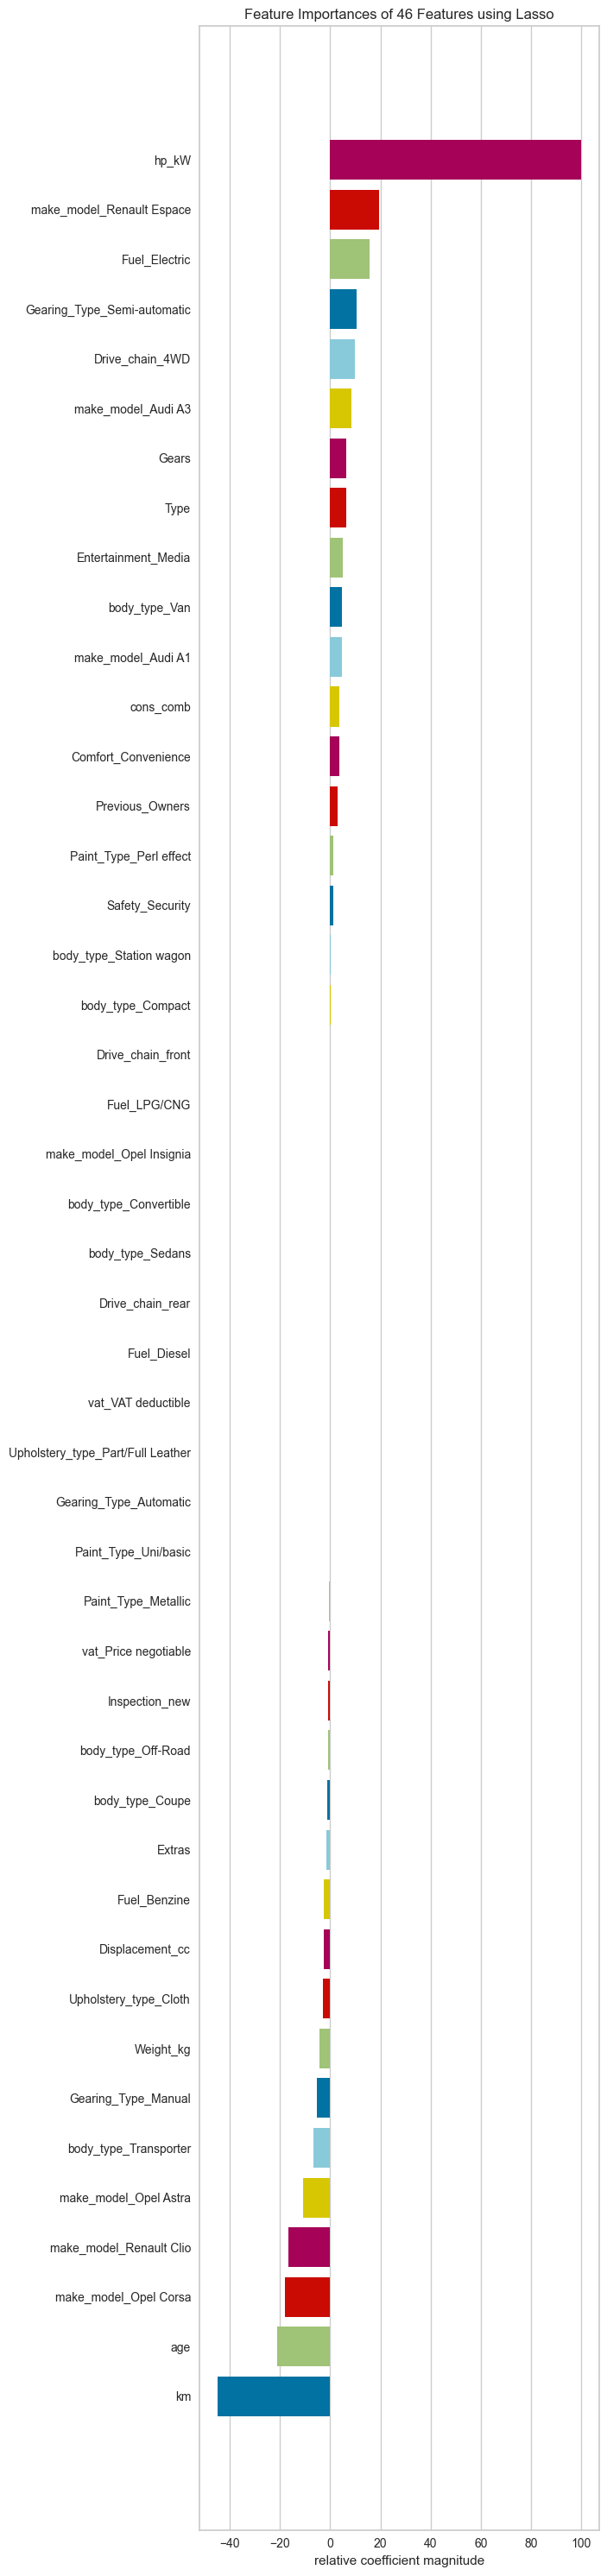

In [99]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = lasso_grid_model.best_estimator_["Lasso"]

viz = FeatureImportances(model,
                         labels=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out())

visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show();

In [100]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [101]:
df_new = df[["make_model", "hp_kW", "km","age", "Gearing_Type", "Drive_chain","Type", "price"]]

In [102]:
df_new

,make_model,hp_kW,km,age,Gearing_Type,Drive_chain,Type,price
0,Audi A1,66.0000,56013.0000,3.0000,Automatic,front,Used,15770
1,Audi A1,141.0000,80000.0000,2.0000,Automatic,front,Used,14500
2,Audi A1,85.0000,83450.0000,3.0000,Automatic,front,Used,14640
3,Audi A1,66.0000,73000.0000,3.0000,Automatic,front,Used,14500
4,Audi A1,66.0000,16200.0000,3.0000,Automatic,front,Used,16790
...,...,...,...,...,...,...,...,...
14216,Renault Espace,118.0000,100.0000,0.0000,Automatic,front,Pre-registered,39980
14217,Renault Espace,147.0000,1647.3626,0.0000,Automatic,front,New,39950
14218,Renault Espace,165.0000,1000.0000,0.0000,Automatic,front,Demonstration,39950
14219,Renault Espace,165.0000,9900.0000,0.0000,Automatic,front,Used,39885


In [103]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
cat_onehot = ['make_model','Gearing_Type','Drive_chain']
cat_ordinal = ['Type']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered","New"]

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                                       (OrdinalEncoder(categories= [cat_for_type]), cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False)

In [106]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=1.011090909090909))]

lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)
train_val(lasso_final_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.8489,0.8517
mae,1953.1598,1914.0179
mse,8121238.1502,7659052.2956
rmse,2849.7786,2767.4993
mape,0.1132,0.1138


### Cross Validate

In [107]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=1.011090909090909))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [108]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                           0.8483
train_r2                                          0.8490
test_neg_mean_absolute_error                  -1956.4974
train_neg_mean_absolute_error                 -1953.0354
test_neg_mean_squared_error                -8159912.4272
train_neg_mean_squared_error               -8119215.9982
test_neg_root_mean_squared_error              -2852.5476
train_neg_root_mean_squared_error             -2849.3742
test_neg_mean_absolute_percentage_error          -0.1134
train_neg_mean_absolute_percentage_error         -0.1132
dtype: float64

In [109]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = mean_squared_error(y_test, y_pred, squared=False)
fm_mape= mean_absolute_percentage_error(y_test, y_pred)

## 7. Visually Compare Models Performance In a Graph

In [110]:
compare = pd.DataFrame({"Model": ["linear_m","ridge_m", "lasso_m", "elastic_m", "final_m"],
                        "r2_score": [lm_R2, rm_R2, lasm_R2, em_R2, fm_R2],
                        "mae": [lm_mae, rm_mae, lasm_mae, em_mae, fm_mae],
                        "rmse": [lm_rmse, rm_rmse, lasm_rmse, em_rmse, fm_rmse],
                        "mape": [lm_mape, rm_mape, lasm_mape, em_mape, fm_mape]})
compare

,Model,r2_score,mae,rmse,mape
0,linear_m,0.8634,1853.3518,2733.0681,0.1108
1,ridge_m,0.8612,1861.1145,2677.4270,0.1104
2,lasso_m,0.8618,1858.4786,2671.7973,0.1102
3,elastic_m,0.8615,1859.6439,2674.2211,0.1103
4,final_m,0.8517,1914.0179,2767.4993,0.1138


In [111]:
compare.sort_values(by="r2_score", ascending=False)

,Model,r2_score,mae,rmse,mape
0,linear_m,0.8634,1853.3518,2733.0681,0.1108
2,lasso_m,0.8618,1858.4786,2671.7973,0.1102
3,elastic_m,0.8615,1859.6439,2674.2211,0.1103
1,ridge_m,0.8612,1861.1145,2677.4270,0.1104
4,final_m,0.8517,1914.0179,2767.4993,0.1138


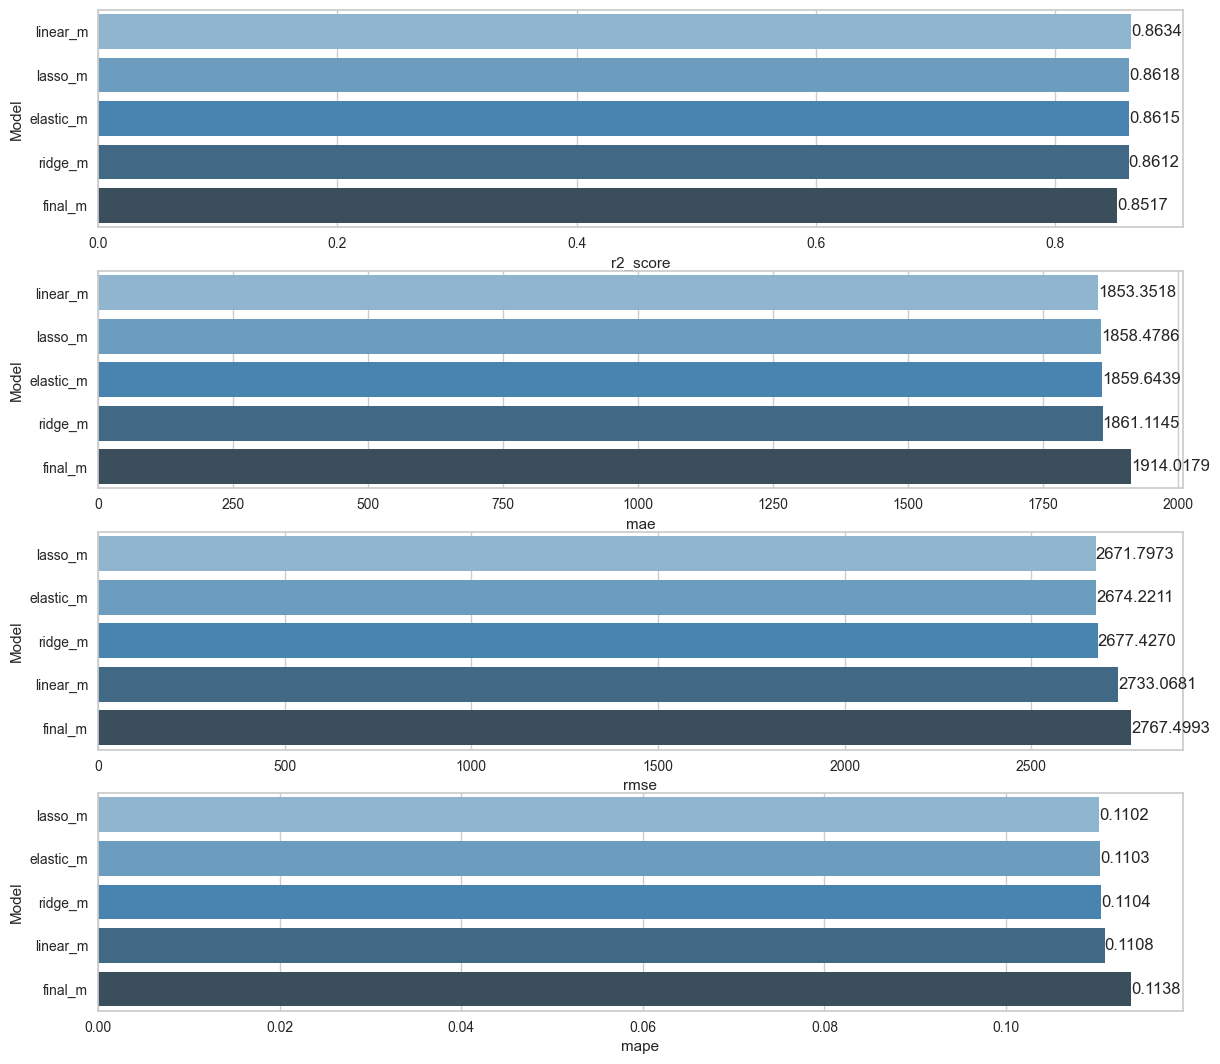

In [112]:
plt.figure(figsize=(14,13))

plt.subplot(411)
compare = compare.sort_values(by="r2_score", ascending=False)
ax=sns.barplot(x="r2_score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.4f")

plt.subplot(412)
compare = compare.sort_values(by="mae", ascending=True)
ax=sns.barplot(x="mae", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.4f")

plt.subplot(413)
compare = compare.sort_values(by="rmse", ascending=True)
ax=sns.barplot(x="rmse", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.4f")

plt.subplot(414)
compare = compare.sort_values(by="mape", ascending=True)
ax=sns.barplot(x="mape", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.4f")
plt.show()

## Final Lasso Model

In [113]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [114]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=1.011090909090909))]
lasso_model = Pipeline(steps=operations)

In [115]:
lasso_model.fit(X, y)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered',
                                                                              'New']]),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Lasso', Lasso(alpha=1.011090909090909))])

## Lasso Deployment

In [116]:
import pickle

In [117]:
pickle.dump(lasso_model, open('lasso_model', 'wb'))

## Random Forest Regressor

In [118]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
cat = X_train.select_dtypes("object").columns
cat

Index(['make_model', 'Gearing_Type', 'Drive_chain', 'Type'], dtype='object')

In [122]:
enc_ordinal = OrdinalEncoder()

column_trans = make_column_transformer((enc_ordinal, cat),
                                        remainder='passthrough', 
                                        verbose_feature_names_out=False).set_output(transform="pandas")

In [123]:
operations = [("Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("DTree", RandomForestRegressor(random_state=42))]

DT_model = Pipeline(steps=operations)

In [124]:
DT_model.fit(X_train, y_train)

Pipeline(steps=[('Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model', 'Gearing_Type', 'Drive_chain', 'Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('DTree', RandomForestRegressor(random_state=42))])

In [125]:
train_val(DT_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.9782,0.9300
mae,598.7929,1154.7941
mse,1172807.4863,3614227.8603
rmse,1082.9624,1901.1123
mape,0.0302,0.0623


In [126]:
enc_ordinal = OrdinalEncoder()

column_trans = make_column_transformer((enc_ordinal, cat),
                                        remainder='passthrough', 
                                        verbose_feature_names_out=False).set_output(transform="pandas")
operations = [("Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("DTree2", RandomForestRegressor(max_depth=8,random_state=42))]

DT_model2 = Pipeline(steps=operations)

In [127]:
DT_model2.fit(X_train, y_train)

Pipeline(steps=[('Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model', 'Gearing_Type', 'Drive_chain', 'Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('DTree2',
                 RandomForestRegressor(max_depth=8, random_state=42))])

In [128]:
train_val(DT_model2, X_train, y_train, X_test, y_test)

,train,test
R2,0.9265,0.9153
mae,1339.2461,1373.2300
mse,3950028.2337,4373732.5021
rmse,1987.4678,2091.3471
mape,0.0721,0.0745


In [129]:
from sklearn.model_selection import cross_validate

operations = [("OrdinalEncoder", column_trans), 
              ("RF_model", RandomForestRegressor(max_depth=9,random_state=42))]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                                           0.9185
train_r2                                          0.9411
test_neg_mean_absolute_error                  -1346.0607
train_neg_mean_absolute_error                 -1194.9367
test_neg_mean_squared_error                -4377356.2130
train_neg_mean_squared_error               -3165530.5857
test_neg_root_mean_squared_error              -2090.1600
train_neg_root_mean_squared_error             -1779.1678
test_neg_mean_absolute_percentage_error          -0.0710
train_neg_mean_absolute_percentage_error         -0.0640
dtype: float64

In [130]:
pickle.dump(DT_model2, open('DT_model', 'wb'))

## Adaboost

In [131]:
from sklearn.ensemble import AdaBoostRegressor

In [132]:
operations = [("Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Ada_model", AdaBoostRegressor(random_state=42))]

Ada_model = Pipeline(steps=operations)

In [133]:
Ada_model.fit(X_train, y_train)

Pipeline(steps=[('Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model', 'Gearing_Type', 'Drive_chain', 'Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Ada_model', AdaBoostRegressor(random_state=42))])

In [134]:
train_val(DT_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.9782,0.9300
mae,598.7929,1154.7941
mse,1172807.4863,3614227.8603
rmse,1082.9624,1901.1123
mape,0.0302,0.0623


In [135]:
Ada_model["Ada_model"].feature_importances_

array([0.21814109, 0.01523488, 0.00647149, 0.06016107, 0.45934317,
       0.17585384, 0.06479445])

## XGBoost

In [143]:
from xgboost import XGBRegressor

operations = [("Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("XGB_model", XGBRegressor(max_depth=5,random_state=42))]

XGB_model = Pipeline(steps=operations)

In [144]:
XGB_model.fit(X_train, y_train)

Pipeline(steps=[('Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model', 'Gearing_Type', 'Drive_chain', 'Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=N...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [145]:
train_val(XGB_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.9547,0.9334
mae,1040.3317,1156.6014
mse,2436123.1291,3437628.8621
rmse,1560.8085,1854.0844
mape,0.0562,0.0620


In [139]:
pickle.dump(XGB_model, open('XGB_model', 'wb'))